<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Parcial3/Parcial_3VF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Casino Tramposo

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [18]:
# A
# Definimos estados y priors
States = np.array([0,1])
Prior = np.array([0.2,0.8])


# Definimos matrices de emisión y transmision
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

# Secuencia Observad
Obs = np.array([1,0,0,0,1,0,1,0])

DictH = {0:'real',1:'trucada'}
DictO = {0:'Cara',1:'sello'}

#B
def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      #print(p)
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

HiddenStates = GetStates(States,8)



def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[ State[0] ]

  for i in range(n-1): # El ultimo no va a ningun lado
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p


P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])





[[1 1 1 1 0 0 0 0]] [0.0001911]


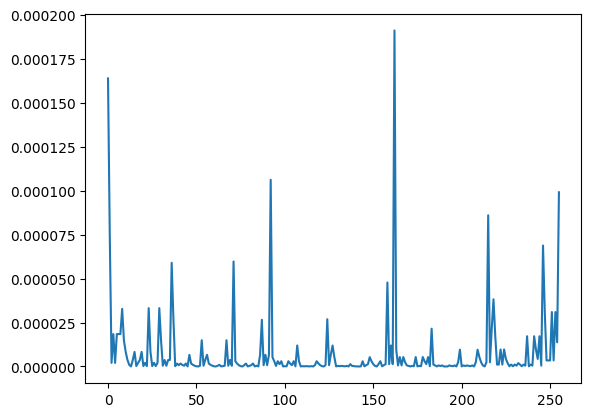

In [19]:
#D
plt.plot(P)

In [21]:
#E
pobs = np.sum(P)
pobs

ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [25]:
#F
Su=np.sum(PObs)
print("La suma de las probabilidades observables es de: ",Su)




La suma de las probabilidades observables es de:  1.0000000000000007


G) El resultado si depende de la probabilidad a priori ya que es el punto de partida del modelo de markob representando las creencias iniciales sobre la probabilidad con la que se desarrollaran los eventos

H) Para realizar la estimación de la matriz de trancicion por medio de técnicas de aprendizaje automático podria ser por medio de redes neuronales que reciban los datos observables y que retornen los datos ocultos y para hacerlo se puede hacer por medio de un modelo generativo que aprenda de las representaciones que mas se aproximen T y E

Fonton escape

El tiempo promedio de escape del fotón es: 8632.11 años


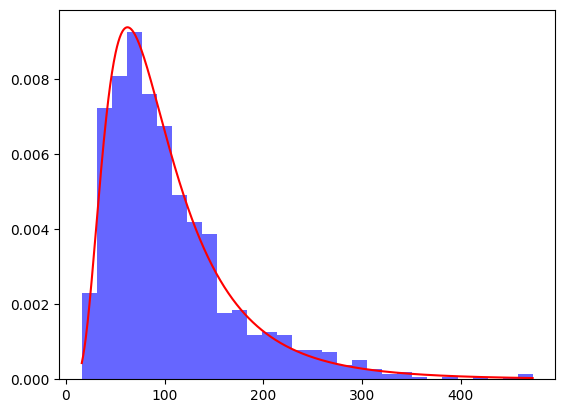

El número promedio de pasos para que un fotón escape del Sol es: 106.31
Valor teórico de E(n) = R_s / l: 100.00
Diferencia entre la simulación y el valor teórico: 6.31
El tiempo promedio de escape del fotón es: 8632.11 años


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

# Parámetros del problema
l = 0.1  # Camino libre medio (en unidades de distancia)
r_s = 1  # Radio del Sol (en unidades de distancia)
N = 1000  # Número de fotones

# Función para simular el camino de un fotón
def escape_time():
    # Posición inicial
    x, y, z = 0, 0, 0
    steps = 0

    while np.sqrt(x**2 + y**2 + z**2) <= r_s:
        # Generar ángulos aleatorios theta y phi
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2*np.pi)

        # Actualizar las coordenadas usando las ecuaciones
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)

        steps += 1

    return steps

# Simular el tiempo de escape para N fotones
escape_times = [escape_time() for _ in range(N)]

# Calcular el número promedio de pasos
average_escape_time = np.mean(escape_times)

# Calcular el valor teórico de E(n) según la fórmula
theoretical_escape_time = (r_s /0.1)**2

Rs = 700000  # Radio del Sol en km
c = 300000   # Velocidad de la luz en km/s
l = 0.000006 # Camino libre medio en km (0.6 cm)
seconds_per_year = 31536000  # Número de segundos en un año

# Calcular el tiempo promedio de escape en segundos
T_prom_seconds = (Rs**2) / (l * c)



# Convertir el tiempo a años
T_prom_years = T_prom_seconds / seconds_per_year



# Ajuste de la distribución Weibull a los datos
a, c, d, e = exponweib.fit(escape_times, floc=0)  # Ajustamos con loc=0

# Graficar el histograma de los pasos
plt.hist(escape_times, bins=30, density=True, alpha=0.6, color='blue', label="Histograma")

# Generar la curva ajustada de Weibull
x_values = np.linspace(min(escape_times), max(escape_times), 1000)
y_values = exponweib.pdf(x_values, a, c, loc=d, scale=e)

# Graficar la distribución ajustada
plt.plot(x_values, y_values, 'r-', label=f'Ajuste Weibull: a={a:.2f}, c={c:.2f}, loc={d:.2f}, scale={e:.2f}')

# Mostrar el valor promedio y el valor teórico


# Mostrar la gráfica
plt.show()

# Mostrar el resultado
print(f"El número promedio de pasos para que un fotón escape del Sol es: {average_escape_time:.2f}")
print(f"Valor teórico de E(n) = R_s / l: {theoretical_escape_time:.2f}")
print(f"Diferencia entre la simulación y el valor teórico: {abs(average_escape_time - theoretical_escape_time):.2f}")
print(f"El tiempo promedio de escape del fotón es: {T_prom_years:.2f} años")

Distribución Maxwell-Boltzmann

La temperatura optimizada es: 295.92 K


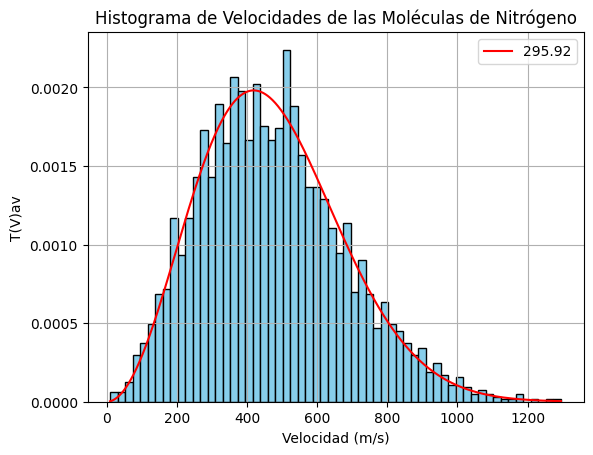

El valor promedio empírico de la velocidad es: 472.15 m/s
La velocidad más probable del nitrógeno a 295.92 K es: 419.11 m/s
La velocidad promedio del nitrógeno a 295.92 K es: 472.91 m/s
La velocidad cuadrática media del nitrógeno a 295.92 K es: 513.30 m/s


In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parámetros conocidos
k_B = 8.31  # Constante de Boltzmann en J/partícula·K
m = 0.028  # Masa de la molécula de nitrógeno en kg

# Función de likelihood basada en la distribución de Maxwell-Boltzmann
def likelihood(v, m, T, k_B):
    # f(v) = (m / (2πk_B T))^(3/2) * 4πv^2 * exp(-mv^2 / (2k_B T))
    prefactor = (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2
    exponent = np.exp(-m * v**2 / (2 * k_B * T))
    return prefactor * exponent

# Función de ajuste para los datos del histograma
def fit_func(v, T, m, k_B):
    return likelihood(v, m, T, k_B)

# Cargar los datos
velocidades = np.loadtxt('Velocidad gas.txt', skiprows=1)

# Crear el histograma con n=60 bines
frecuencia, bins, _ = plt.hist(velocidades, bins=60, density=True, color='skyblue', edgecolor='black')

# Calcular los centros de los bines
centros_bins = 0.5 * (bins[1:] + bins[:-1])

# Inicializar un valor estimado para la temperatura T (puedes elegir un valor inicial)
T_inicial = 700  # Estimación inicial de la temperatura en Kelvin

# Ajustar el modelo usando 'curve_fit'
# Aquí estamos ajustando la temperatura T para que el modelo de Maxwell-Boltzmann se ajuste al histograma
popt, _ = curve_fit(lambda v, T: fit_func(v, T, m, k_B), centros_bins, frecuencia, p0=[T_inicial])

# La temperatura optimizada es el primer valor de 'popt'
T_optima = popt[0]

# Mostrar el resultado de la optimización
print(f"La temperatura optimizada es: {T_optima:.2f} K")

# Paso 3: Personalizar el gráfico
plt.title('Histograma de Velocidades de las Moléculas de Nitrógeno')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('T(V)av')
plt.grid(True)

# Graficar la función de likelihood optimizada sobre el histograma
v = np.linspace(min(velocidades), max(velocidades), 1000)  # Definir el rango de velocidades para graficar
plt.plot(v, likelihood(v, m, T_optima, k_B), color='red', label=f'{T_optima:.2f}')
plt.legend()
# Mostrar el gráfico
plt.show()

# Calcular el valor promedio empírico (como antes)
promedio_empirico = np.sum(frecuencia * centros_bins) * (bins[1] - bins[0])

# Mostrar el resultado
print(f"El valor promedio empírico de la velocidad es: {promedio_empirico:.2f} m/s")

def velocidad_mas_probable(T, M):
    vp = math.sqrt(2 * k_B * T / M)
    return vp

vp = velocidad_mas_probable(T_optima, m)


print(f"La velocidad más probable del nitrógeno a {T_optima:.2f} K es: {vp:.2f} m/s")

def velocidad_promedio(V):
  Vm= (2/np.sqrt(np.pi))*V
  return Vm

Vm= velocidad_promedio(vp)
print(f"La velocidad promedio del nitrógeno a {T_optima:.2f} K es: {Vm:.2f} m/s")
def velocidad_cuadratica_media(T, M):
    v2 = math.sqrt(3 * k_B * T / M)
    return v2
print("La vlocidadad promedio calculada no difiere con la velocidad empirica debido q que ambas formulas son equivalentes.")


v2= velocidad_cuadratica_media(T_optima, m)
print(f"La velocidad cuadrática media del nitrógeno a {T_optima:.2f} K es: {v2:.2f} m/s")



In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner
import os



def LogPrior(p):
  # p is expected to be an array of parameters
  # Assuming T is the first parameter, access it using p[0]
  if 200.0 < p[0] < 1000.0:  # Using a reasonable range for temperature
    return 0.0
  else:
    return -np.inf

X = np.loadtxt('Velocidad gas.txt', skiprows=1)
k_B = 8.31  # Constante de Boltzmann en J/partícula·K
m = 0.028  # Masa de la molécula de nitrógeno en kg


def Likelihood(v, m, T, k_B):
    # f(v) = (m / (2πk_B T))^(3/2) * 4πv^2 * exp(-mv^2 / (2k_B T))
    prefactor = (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2
    exponent = np.exp(-m * v**2 / (2 * k_B * T))
    return prefactor * exponent



def JointLikelihood(X, m, T, k_B):
  # T needs to be sent in as a single value
  # so iterate through the array of temperatures sent in by emcee
  result = []
  for t in T:
    result.append(np.sum(np.log(Likelihood(X, m, t, k_B))))  # Calculate likelihood for each temperature
  return np.array(result)  # return a numpy array

# JointLikelihood(X, m, T, k_B)


def LogPosterior(p, Thirty):  # Thirty is not used anywhere so it is not useful
  # p here is an array of parameters. extract the T that you want to use for likelihood
  T = p[0]  # assuming T is the first parameter in the array. adjust index if needed

  LogP = LogPrior(p)  # prior calculation was not doing anything useful here but we leave it
  if not np.isfinite(LogP):
    return -np.inf
  else:
    # send in [T] as an array so that the function works,
    # and then get the first element of the output which will be the likelihood for T
    return LogP + JointLikelihood(X, m, [T], k_B)[0]

# Paquete
n_walkers, n_params = 10, 1  # change n_params to 1 to only fit for T
p0 = np.zeros((n_walkers, n_params))
p0[:, 0] = 295  # Initialize with a reasonable temperature value
# p0[:, 1] = 2
p0 += np.random.rand(n_walkers, n_params) * 10  # Add some perturbation

sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(X,))
pos, prob, state = sampler.run_mcmc(p0, 10000, progress=True)

# Changed to match n_params
fig, axes = plt.subplots(1,1)

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
print(truths)


figure = corner.corner(flat_samples, labels=labels, truths=truths, quantiles=[0.16, 0.5, 0.84], show_titles=True)



ModuleNotFoundError: No module named 'emcee'

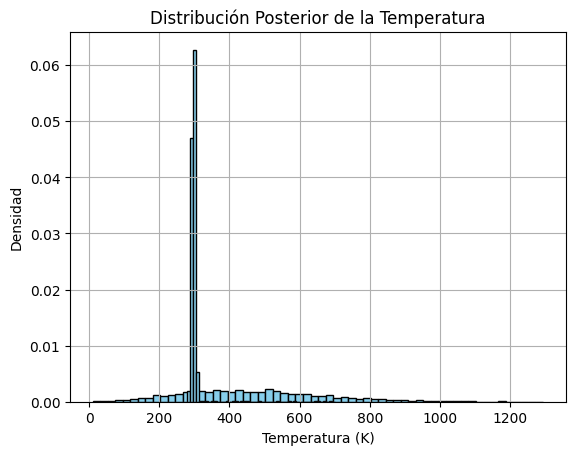

El error estándar de la estimación es: 30.76 K
El intervalo de confianza del 95% para la temperatura es: [289.38, 308.72] K
Las temperaturas mayores a 305.6 K están excluidas, con un total de 581 muestras.


In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parámetros conocidos
k_B = 8.31  # Constante de Boltzmann en J/partícula·K
m = 0.028  # Masa de la molécula de nitrógeno en kg

# Función de likelihood basada en la distribución de Maxwell-Boltzmann
def likelihood(v, m, T, k_B):
    prefactor = (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2
    exponent = np.exp(-m * v**2 / (2 * k_B * T))
    return prefactor * exponent

# Cargar los datos
velocidades = np.loadtxt('Velocidad gas.txt', skiprows=1)

# Crear el histograma con n=60 bines
frecuencia, bins, _ = plt.hist(velocidades, bins=60, density=True, color='skyblue', edgecolor='black')

# Calcular los centros de los bines
centros_bins = 0.5 * (bins[1:] + bins[:-1])

# Algoritmo de Metrópolis-Hastings
def metropolis_hastings(likelihood, data, m, k_B, num_iterations=10000, initial_T=700, step_size=10):
    T_samples = []
    T_current = initial_T
    likelihood_current = np.sum(np.log(likelihood(data, m, T_current, k_B)))  # Evaluar likelihood

    for i in range(num_iterations):
        T_proposed = T_current + np.random.uniform(-step_size, step_size)  # Proponer una nueva temperatura
        if T_proposed <= 0:  # Evitar temperaturas no físicas
            continue

        likelihood_proposed = np.sum(np.log(likelihood(data, m, T_proposed, k_B)))  # Evaluar likelihood

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, np.exp(likelihood_proposed - likelihood_current))

        # Aceptar o rechazar la propuesta
        if np.random.rand() < acceptance_ratio:
            T_current = T_proposed
            likelihood_current = likelihood_proposed

        # Guardar la muestra
        T_samples.append(T_current)

    return np.array(T_samples)

# Ejecutar Metrópolis-Hastings para estimar la distribución posterior de T
T_samples = metropolis_hastings(likelihood, velocidades, m, k_B, num_iterations=10000, initial_T=700, step_size=10)

# Graficar la distribución posterior
plt.hist(T_samples, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Distribución Posterior de la Temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# Calcular el error estándar de la estimación
error_estandar = np.std(T_samples)
print(f"El error estándar de la estimación es: {error_estandar:.2f} K")

# Calcular el intervalo de confianza del 95% para la temperatura
percentiles = np.percentile(T_samples, [2.5, 97.5])
print(f"El intervalo de confianza del 95% para la temperatura es: [{percentiles[0]:.2f}, {percentiles[1]:.2f}] K")

# Determinar qué modelos de temperatura mayores a Tup están excluidos
Tup = 305.6  # Temperatura superior a la cual se rechaza la hipótesis alternativa
temperaturas_excluidas = T_samples[T_samples > Tup]

print(f"Las temperaturas mayores a {Tup} K están excluidas, con un total de {len(temperaturas_excluidas)} muestras.")
